In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd


In [2]:
poke_csv="Resources/clean_data.csv"
poke_df= pd.read_csv(poke_csv)
poke_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<AxesSubplot:>

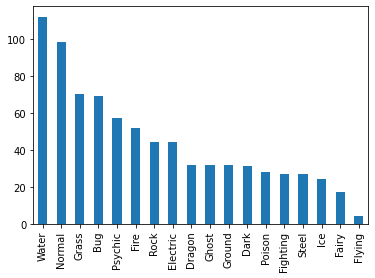

In [3]:
poke_df["Type1"].value_counts().plot.bar()

<AxesSubplot:>

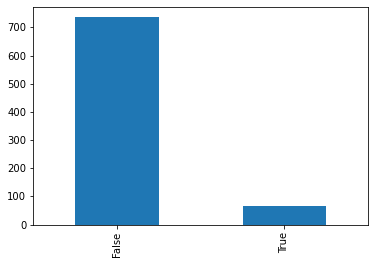

In [4]:
poke_df["Legendary"].value_counts().plot.bar()

In [5]:
#Clean the dataframe to include only relevant columns and create a recode column for each type 
poke_df["Type1_Recode"] = ""
poke_df["Type2_Recode"] = ""
poke_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,Type1_Recode,Type2_Recode
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,,
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,,
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,,
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,,
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,,
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,,
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,,
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,,


In [6]:
#Gather list of unique pokemon types
type1_list = poke_df["Type1"].unique()
type1_list

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(poke_df["Type1"])
encoded_type1 = label_encoder.transform(poke_df["Type1"])

In [8]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_type1 = to_categorical(encoded_type1)
one_hot_type1

Using TensorFlow backend.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# Create df of one hot encoding
hot_df = pd.DataFrame(one_hot_type1)
hot_df

#Merge the encoding with the pokemon dataframe
merged_df = pd.merge(poke_df,hot_df, how='outer', left_index=True, right_index=True)
merged_df

#Rename the columns
final_df = merged_df.rename(columns = {0:"Grass",
                                       1:"Fire",
                                       2:"Water",
                                       3:"Bug",
                                       4:"Normal",
                                      5:"Poison",
                                      6:"Electric",
                                      7:"Ground",
                                      8:"Fairy",
                                      9:"Fighting",
                                      10:"Psychic",
                                      11:"Rock",
                                      12:"Ghost",
                                      13:"Ice",
                                      14:"Dragon",
                                      15:"Dark",
                                      16:"Steel",
                                      17:"Flying"})
final_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
#Split the sample by legendary status
legendary_df = final_df[final_df["Legendary"] == True]
nonlegend_df = final_df[final_df["Legendary"] == False]

#Display the lengths of each df
print(len(legendary_df), len(nonlegend_df))

65 735


In [11]:
#Take 80% non legendary and 20% of legendary
train_legendary_df = legendary_df.sample(n=int((len(legendary_df)*.8)))
train_nonlegend_df = nonlegend_df.sample(n=int((len(nonlegend_df)*.8)))

#Using 100 nonlegendary since the size was skewing the dataset

In [12]:
train_df = train_legendary_df.append(train_nonlegend_df)
train_df = train_df.sort_index()
train_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
#Create the difference of the final and sample df
test_df = pd.concat([final_df, train_df]).loc[
    final_df.index.symmetric_difference(train_df.index)
]

test_df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,14,Kakuna,Bug,Poison,205,45,25,50,25,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,16,Pidgey,Normal,Flying,251,40,45,40,35,35,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,709,Trevenant,Ghost,Grass,474,85,110,76,65,82,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
x = train_df
y = train_df['Legendary']
x = x.drop(["Legendary","Name","#","Type1","Type2", "Type1_Recode","Type2_Recode","Generation"],1)
x

,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Grass,Fire,Water,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,318,45,49,49,65,65,45,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,525,80,82,83,100,100,80,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,309,39,52,43,60,50,65,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,405,58,64,58,80,65,80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,534,78,84,78,109,85,100,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,600,108,100,121,81,95,95,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,600,50,100,150,100,150,50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,700,50,160,110,160,110,110,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
798,680,80,160,60,170,130,80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 47, test_size = 0.20)

In [16]:
from imblearn.over_sampling import SMOTE

# sampling ration of 1.0 will equally balance the binary classes
sm = SMOTE(random_state=15,sampling_strategy= 1.0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [17]:
X_train_res.shape

(950, 25)

In [18]:
#Showing the amount of legendary pokemon created
(y_train_res == True).sum()

475

In [20]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
model = RandomForestClassifier(n_estimators=100,max_depth=7)

In [21]:
#Training the random forest classifier. 
model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=7)

In [23]:
y_pred =  model.predict(X_test)

In [24]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_res, y_pred=model.predict(X_train_res)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.9863157894736843
Accuracy Score on test data:  0.9296875


In [125]:
# feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Attack,0.147
SpAtk,0.147
HP,0.125
Speed,0.109
Total,0.077
Dragon,0.075
Flying,0.061
SpDef,0.052
Defense,0.037


In [79]:
#Predicting labels on the test set.
y_pred =  model.predict(X_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
model = RandomForestClassifier(n_estimators=100,max_depth=7)

In [132]:
# get linear regression
from sklearn.linear_model import LinearRegression

In [134]:
clf = RandomForestClassifier()

In [135]:
# fit the data 
clf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [136]:
# predict the model
clf.predict(X_test)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False]

In [137]:
# check the score of the model

clf.score(X_test, y_test)

0.9453125